# Exploratory Data Analysis

### This dataset *movies_full.csv* is downloaded to GitHub: https://github.com/nastazya/Movies-analytics/tree/master/data

In [4]:
# import the library
%matplotlib inline

import ast
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 24)

In [5]:
df = pd.read_csv('data/movies_full_with_outliers.csv')
df['release_date'] = pd.to_datetime(df['release_date'])
print(df.dtypes)

id                               int64
title                           object
budget                           int64
revenue                        float64
release_date            datetime64[ns]
popularity                     float64
vote_average                   float64
genres                          object
production_companies            object
cast                            object
keywords                        object
dtype: object


In [6]:
#Setting cast, production_companies, genres and keywords types to a list of dictionaries

df['genres'] = df['genres'].astype(str)
df['production_companies'] = df['production_companies'].astype(str)
df['cast'] = df['cast'].astype(str)
df['keywords'] = df['keywords'].astype(str)

df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x))
df['cast'] = df['cast'].apply(lambda x: ast.literal_eval(x))
df['keywords'] = df['keywords'].apply(lambda x: ast.literal_eval(x))

#checking results
cell = df['genres'][100]
print('\nGenres cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['production_companies'][100]
print('\nProduction_companies cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['cast'][100]
print('\nCast cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['keywords'][100]
print('\nKeywords cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))


Genres cell:  <class 'list'> . 
Cell[0]:  {'id': 16, 'name': 'Animation'} :  <class 'dict'>

Production_companies cell:  <class 'list'> . 
Cell[0]:  {'name': 'Steve Krantz Productions', 'id': 5067} :  <class 'dict'>

Cast cell:  <class 'list'> . 
Cell[0]:  {'cast_id': 2, 'character': 'Michael Corleone', 'credit_id': '52fe44289251416c91006c3f', 'gender': 2, 'id': 936451, 'name': 'Joseph Kaufmann', 'order': 0, 'profile_path': None} :  <class 'dict'>

Keywords cell:  <class 'list'> . 
Cell[0]:  {'id': 293, 'name': 'female nudity'} :  <class 'dict'>


In [7]:
df.head(5)

,id,title,budget,revenue,release_date,popularity,vote_average,genres,production_companies,cast,keywords
0,36523,Felix The Cat: The Movie,9000000,1964253.00,1988-10-01,0.03,3.70,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...","[{'name': 'Pannónia Filmstúdió', 'id': 48669},...","[{'cast_id': 1, 'character': 'Felix the Cat (V...","[{'id': 9820, 'name': 'alternate dimension'}, ..."
1,68351,Sankofa,1000000,2691899.00,1993-05-28,0.05,6.90,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Channel Four Films', 'id': 181}, {'...","[{'cast_id': 6, 'character': 'Sankofa', 'credi...","[{'id': 409, 'name': 'africa'}, {'id': 2831, '..."
2,285908,The Last Breath,3800000,559298.00,1999-03-25,0.07,4.00,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[{'name': 'Lions Gate Films', 'id': 35}]","[{'cast_id': 0, 'character': 'Lauren Vaillanco...","[{'id': 10714, 'name': 'serial killer'}]"
3,121173,Voracious,11178,34659.00,2012-09-05,0.08,8.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'APT Entertainment', 'id': 8355}, {'...","[{'cast_id': 16, 'character': 'Rene', 'credit_...","[{'id': 4694, 'name': 'staged death'}, {'id': ..."
4,110669,Wabash Avenue,2115000,2039000.00,1950-03-31,0.11,7.00,"[{'id': 10402, 'name': 'Music'}]",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'cast_id': 1004, 'character': 'Ruby Summers'...","[{'id': 4344, 'name': 'musical'}, {'id': 4497,..."


In [8]:
#Extra adjustments for the points discovered later during the process

#replace FRF budget by USD
df.loc[df['id'] == 10656, ['budget']] = 25974
print(df.loc[df['id'] == 10656, ['title']])

#wrong revenue
df.loc[df['id'] == 9838, ['revenue']] = 15057465
print(df.loc[df['id'] == 9838, ['title']])

       title
2134  Subway
                     title
1242  King Solomon's Mines


# Data Perspective
- One variable
    - Numeric variables
        - continuous: budget, revenue
        - discrete: votes, popularity
    - Categorical variables
        - ordinal: date
        - nominal: genre, production_companies, actors, keywords
- Multiple variables
    - Numeric x Numeric
        - budget VS revenue
        - correlation heatmap
    - Categorical x Numeric
        -  Calculate average vote for each genre and show vote distribution
        -  Show the raitings for each Marvel movie (raitings dataset used in this case)
    - Categorical x Categorical
        - actors VS genre
        - production_companies VS genre

## One Variable (numeric)

        - continuous: budget, revenue
        - discrete: votes, popularity

count        4920.00
mean     32763399.00
std      40403990.00
min           113.00
25%       6400000.00
50%      19000000.00
75%      40000000.00
max     380000000.00
Name: budget, dtype: float64


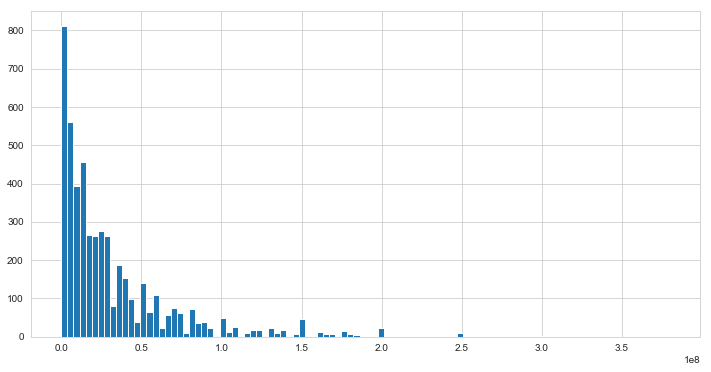

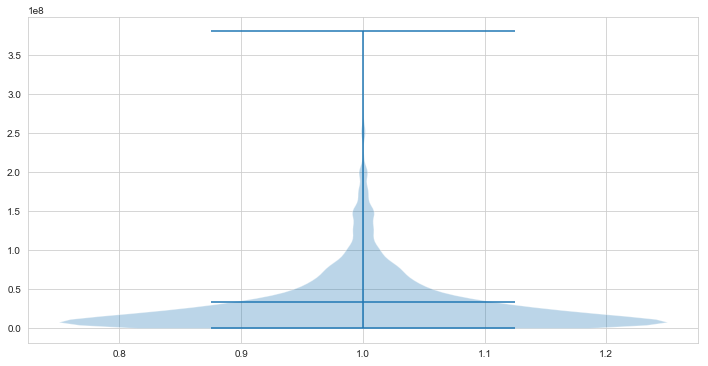

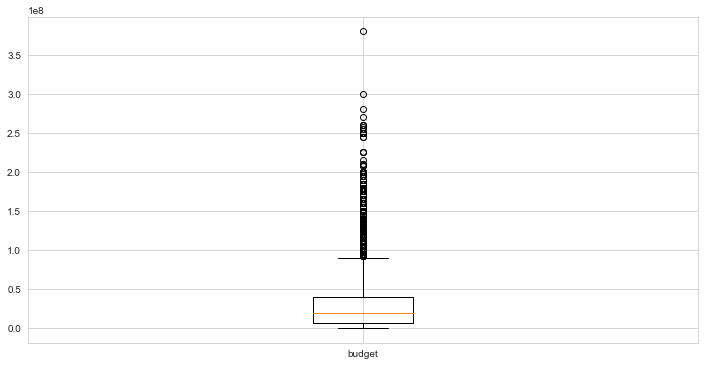

In [9]:
# Analize budget distribution
# There is very large budget dispersion. Most of the movies's budget is below 6M

# Histogram
print(df['budget'].describe().round())
plt.figure(figsize=(12,6))
plt.hist(df['budget'], bins=100)
plt.show()
# Violin and box plot
plt.figure(figsize=(12,6))
plt.violinplot(df['budget'], showmeans=True)
plt.show()
plt.figure(figsize=(12,6))
plt.boxplot(df['budget'])
plt.xticks([1], ['budget'], rotation='horizontal')
plt.show()

count   4920.00
mean       6.31
std        0.87
min        2.00
25%        5.80
50%        6.40
75%        6.90
max        9.10
Name: vote_average, dtype: float64


C:\Users\Anastasia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


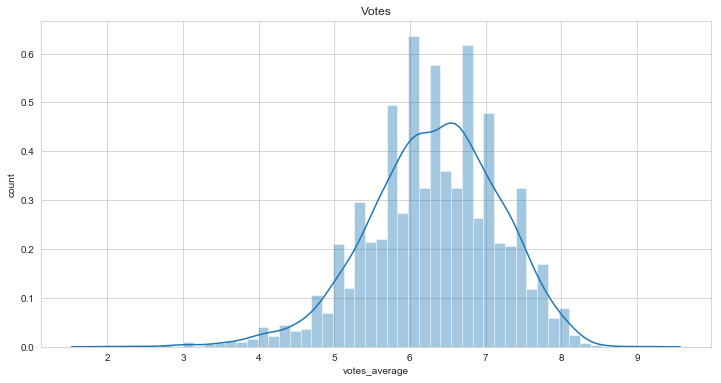

In [10]:
#Analyze votes
# Votes are subject to normal distribution with most of them between 5 and 8

print(df['vote_average'].describe())
plt.figure(figsize=(12,6))
#plt.hist(df['vote_average'], bins=100)
sns.distplot(df['vote_average']);
plt.title('Votes')
plt.xlabel('votes_average')
plt.ylabel('count')
plt.show()

count   4920.00
mean       9.57
std        5.83
min        0.03
25%        6.11
50%        8.80
75%       11.97
max       51.65
Name: popularity, dtype: float64


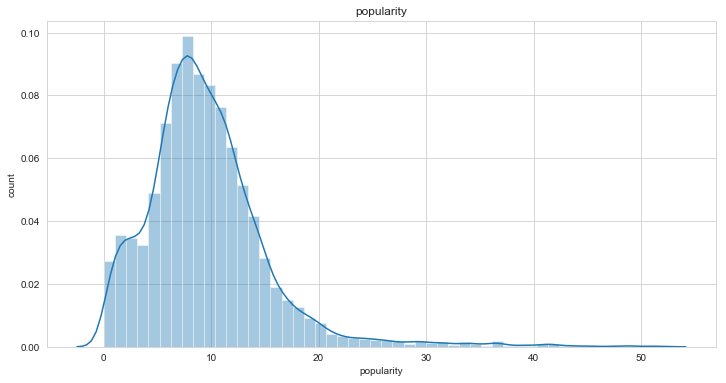

In [11]:
#Analyze popularity
# Popularity has higher variety with average of 8.74. It changes smoother then votes as it is not mesured by the human raiting 
# but by the number of views 
print(df['popularity'].describe())
plt.figure(figsize=(12,6))
#plt.hist(df['popularity'], bins=100)
sns.distplot(df['popularity'])
plt.title('popularity')
plt.xlabel('popularity')
plt.ylabel('count')
plt.show()

## One Variable (categorical)

        - ordinal: date
        - nominal: genre, production_companies, actors, keywords

Nominal values (genre, production companies and keywords) have to be extracted from lists of dictionaries

Min year:  1915 
Max year:  2017


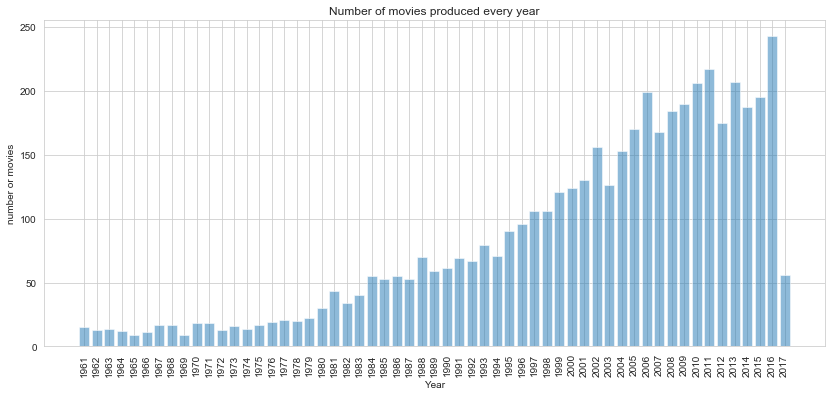

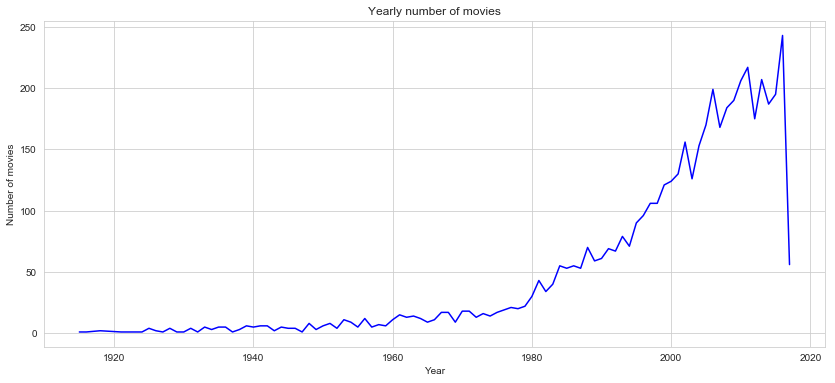

In [14]:
# Analize release date
# We see that there is a strong tendency of grouth movies produced every year
df['year'] = df['release_date'].dt.year
df['year_month'] = pd.to_datetime(df['release_date']).dt.to_period('M')
print('Min year: ', df['year'].min(), '\nMax year: ', df['year'].max())

df_year = df.groupby(by='year')['id'].count()
df_year = df_year[df_year.index>1960]
# Bar Chart
plt.figure(figsize=(14,6))
plt.title('Number of movies produced every year')
plt.xlabel('Year')
plt.ylabel('number or movies')
y_pos = range(df_year.count())
plt.bar(y_pos,df_year.values, align='center', alpha=0.5)
plt.xticks(y_pos, df_year.index, rotation='vertical')
plt.show()

#Line plot
df_year = df.groupby(by='year')['id'].count()
plt.figure(figsize=(14,6))
plt.plot(df_year.index, df_year.values, '-', color = 'blue')
plt.title('Yearly number of movies')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()

Number of Movies in each genre:
1   TV Movie
11   Foreign
40   Documentary
87   Western
175   Music
189   War
224   History
284   Animation
431   Mystery
492   Fantasy
508   Family
562   Horror
605   Science Fiction
816   Crime
897   Romance
924   Adventure
1313   Action
1422   Thriller
1642   Comedy
2350   Drama
Number os genres:  20


([<matplotlib.axis.XTick at 0x2159cf6a908>,
 <a list of 20 Text xticklabel objects>)

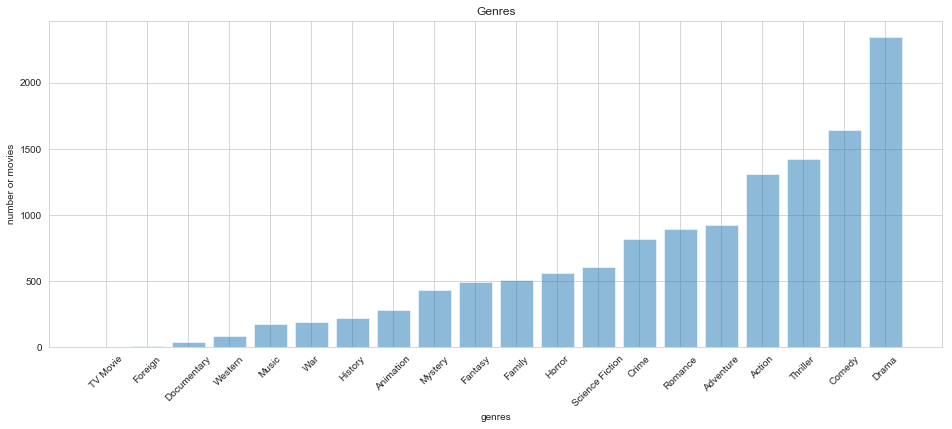

In [15]:
# Analize genres
#There are 20 genres. In our dataset there is only one TV Show and 2287 Dramas (highest number og movies in Drama)
l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
genres_all = np.array(l) 
g_name, g_count = np.unique(genres_all, return_counts=True)
genres = zip(g_name, g_count) # list of Unique Values along with occurrence Count
genres = list(genres)
genres = sorted(genres, key = lambda x: x[1])
print('Number of Movies in each genre:')
for i, elem in enumerate(genres):
    print(genres[i][1], ' ', genres[i][0])
    g_name[i] = elem[0]
    g_count[i] = elem[1]
print('Number os genres: ', len(genres))

# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Genres')
plt.xlabel('genres')
plt.ylabel('number or movies')
y_pos = range(len(g_name))
plt.bar(y_pos,g_count, align='center', alpha=0.5)
plt.xticks(y_pos, g_name, rotation=45)


In [16]:
# Revenue per genre



Number of production companies:  5100


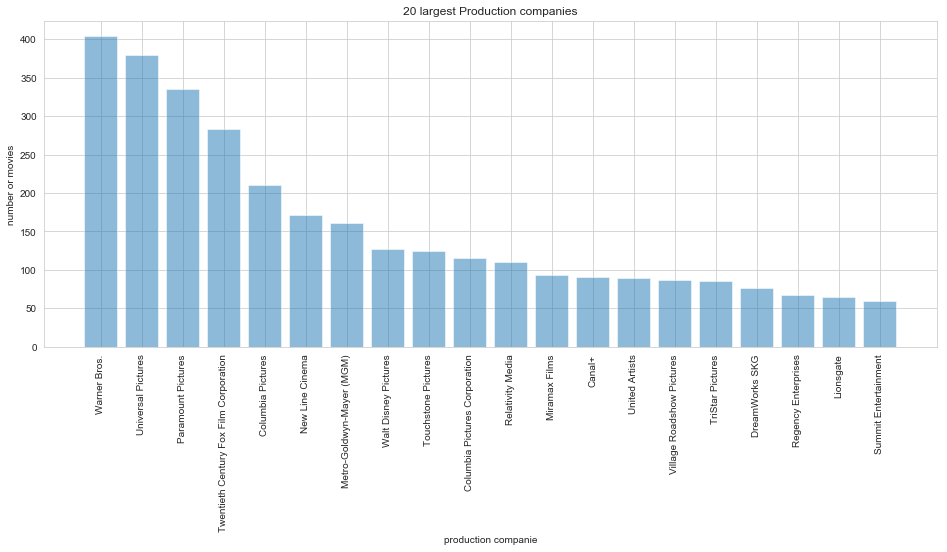

In [17]:
# Analize production companies
# There are 4981 companies in the dataset and the biggest ones are Warner Brothers, Universal Pictures and Paramount 
l=[]
for i, item in enumerate(df['production_companies']):
    for cell in item:
        l.append(cell['name'])
prod_all = np.array(l) 
p_name, p_count = np.unique(prod_all, return_counts=True)
prod = zip(p_name, p_count) # list of Unique Values along with occurrence Count
prod = list(prod)
prod = sorted(prod, key = lambda x: x[1], reverse = True)
print('Number of production companies: ', len(prod))

    
#20 companies which produced the hihest number of movies
p_name_20 = []
p_count_20 = []
for i in range(20):
    p_name_20.append(prod[i][0])
    p_count_20.append(prod[i][1])

# Bar Chart
plt.figure(figsize=(16,6))
plt.title('20 largest Production companies')
plt.xlabel('production companie')
plt.ylabel('number or movies')
y_pos = range(len(p_name_20))
plt.bar(y_pos,p_count_20, align='center', alpha=0.5)
plt.xticks(y_pos, p_name_20, rotation='vertical')
plt.show()

## Multiple variables (Numeric x Numeric)

        - budget VS revenue
        - correlation heatmap

Correlation between budget and revenue: 

          budget  revenue
budget     1.00     0.72
revenue    0.72     1.00


Text(0, 0.5, 'Revenue')

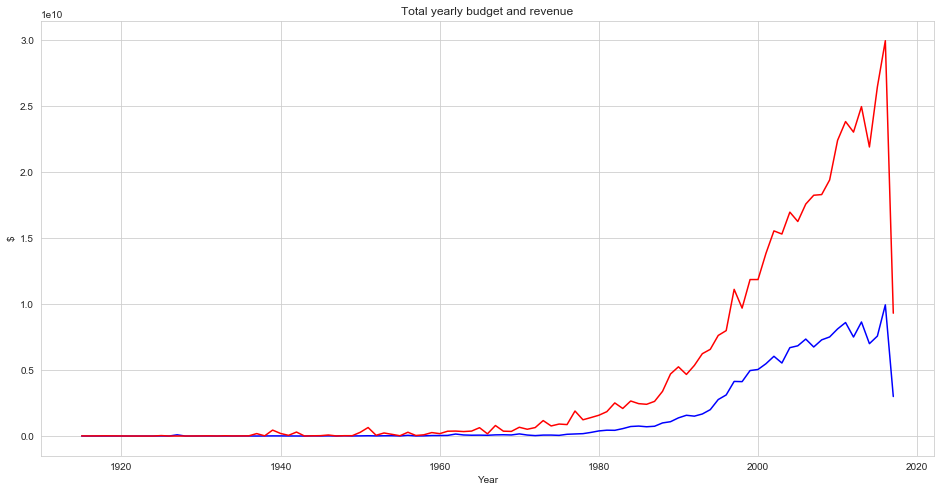

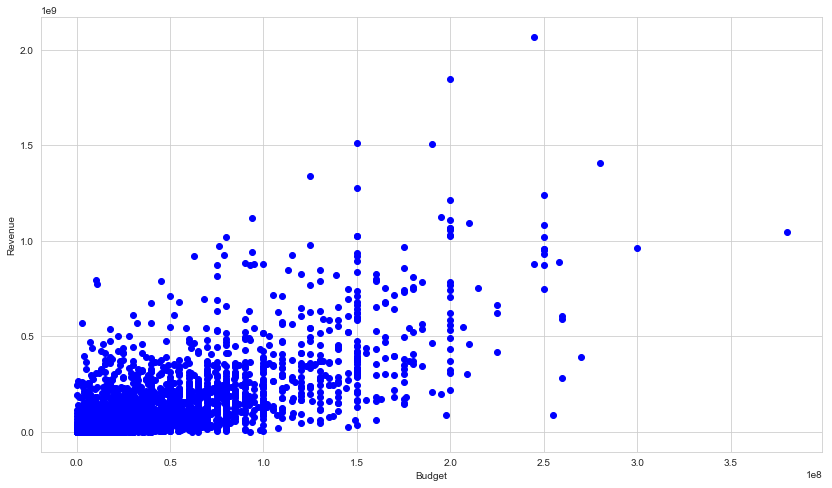

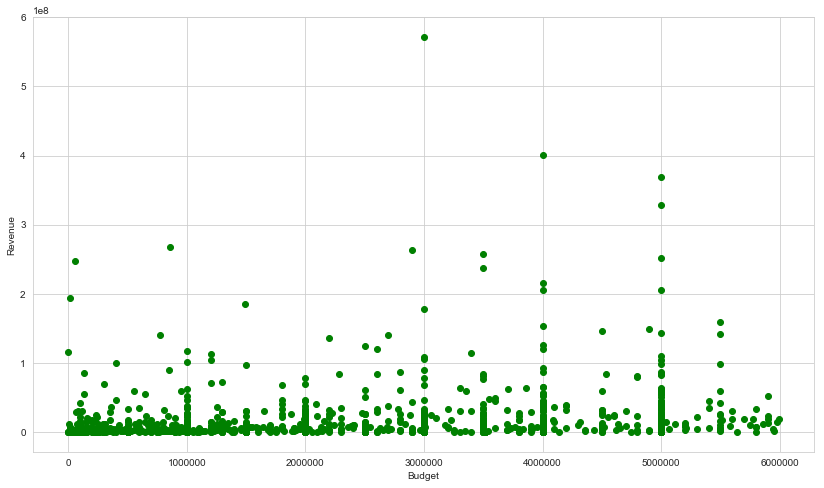

In [65]:
# Budget VS Revenue

budget_year = df.groupby(by='year')['budget'].sum()
#print('Total budget per year:\n', budget_year_u.sort_values(ascending=False))
revenue_year = df.groupby(by='year')['revenue'].sum()
#print('Total revenue per year:\n', revenue_year_u.sort_values(ascending=False))


#Plot curves
plt.figure(figsize=(16,8))
plt.plot(budget_year.index, budget_year.values, '-', color = 'blue', label='Budget')
plt.plot(revenue_year.index, revenue_year.values, '-', color = 'red', label='Revenue')
plt.title('Total yearly budget and revenue')
labels = [str(x) for x in range(1970, 2020, 5)]
#plt.xticks(range(1970, 2020, 5), labels, rotation=45)
plt.xlabel('Year')
plt.ylabel('$')

#Plot scatter
plt.figure(figsize=(14,8))
plt.plot(df['budget'], df['revenue'], 'o', color='blue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

print('Correlation between budget and revenue: \n\n', df[['budget','revenue']].corr())
# Visually we can not see that these two are correlated but correlation index is pretty high. 
# This means that many movies are concentrated in the lower left corner. 
# We must cut out some of the movies with hight prices to see better.
# Lets "zoom in" by taking movies with budget less then 6M and we see that with lower budget dependencie tends to be stronger 

df_temp = df[df['budget'] < 6000000]
plt.figure(figsize=(14,8))
plt.plot(df_temp['budget'], df_temp['revenue'], 'o', color='green')
plt.xlabel('Budget')
plt.ylabel('Revenue')

Correlation between popularity and revenue: 

             popularity  revenue
popularity        1.00     0.54
revenue           0.54     1.00


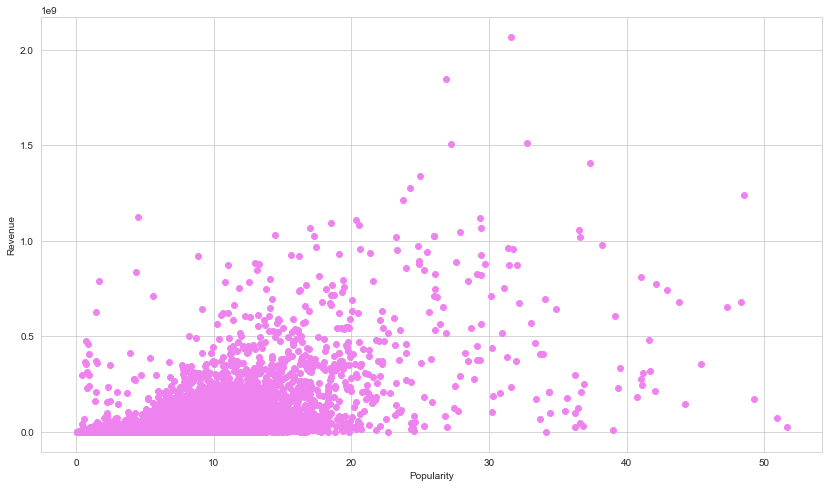

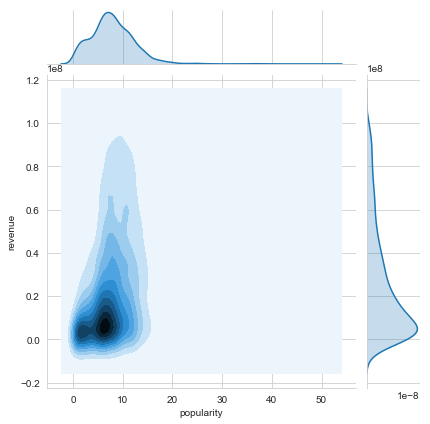

In [41]:
# Revenue VS Popularity

budget_year = df.groupby(by='year')['popularity'].sum()
#print('Total budget per year:\n', budget_year_u.sort_values(ascending=False))
revenue_year = df.groupby(by='year')['revenue'].sum()
#print('Total revenue per year:\n', revenue_year_u.sort_values(ascending=False))



#Plot scatter
plt.figure(figsize=(14,8))
plt.plot(df['popularity'], df['revenue'], 'o', color='violet')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

print('Correlation between popularity and revenue: \n\n', df[['popularity','revenue']].corr())

sns.jointplot(x="popularity", y="revenue", data=df_temp[['popularity', 'revenue']], kind="kde")

In [14]:
# Correlation
df.corr()

,id,budget,revenue,popularity,vote_average,year
id,1.00,-0.02,0.00,0.12,-0.01,0.44
budget,-0.02,1.00,0.72,0.45,-0.04,0.28
revenue,0.00,0.72,1.00,0.54,0.16,0.17
popularity,0.12,0.45,0.54,1.00,0.25,0.18
vote_average,-0.01,-0.04,0.16,0.25,1.00,-0.18
year,0.44,0.28,0.17,0.18,-0.18,1.00


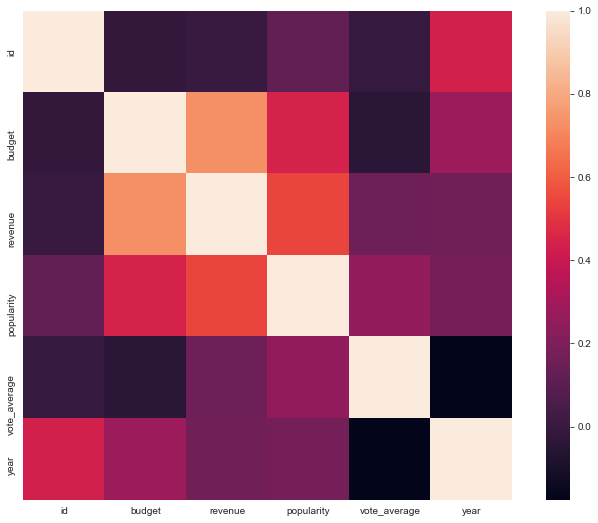

In [15]:
# heatmap
cor = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cor, vmax=1, square=True)
plt.show()

## Multiple variables (Categorical x Numeric)

        -  Calculate average budget spent for each year 
        -  Show the raitings for each Marvel movie (raitings dataset used in this case)

          id                  title    budget
15    142159    Across to Singapore    290000
19    173689     Lights of New York     75000
37     73575               Sparrows    463455
62     82096       The Painted Veil    947000
78     27506       West of Zanzibar    259000
88     65203    The Broadway Melody    379000
90     38687    Flesh and the Devil    373000
91    108923    The Mysterious Lady       337
198    35545              Mata Hari    558000
223    34456           I'm No Angel    225000
271    43595     She Done Him Wrong    200000
447    31526        Queen Christina   1114000
777     3062            42nd Street    439000
935    22301          Hell's Angels   3950000
1368    3078  It Happened One Night    325000
1844     138                Dracula    355000
2143    3035           Frankenstein    291000
2431     244              King Kong    672000
3170    3529           The Thin Man    226408
3283     901            City Lights   1500000
3365   33680            Grand Hote

Text(0, 0.5, 'Budget')

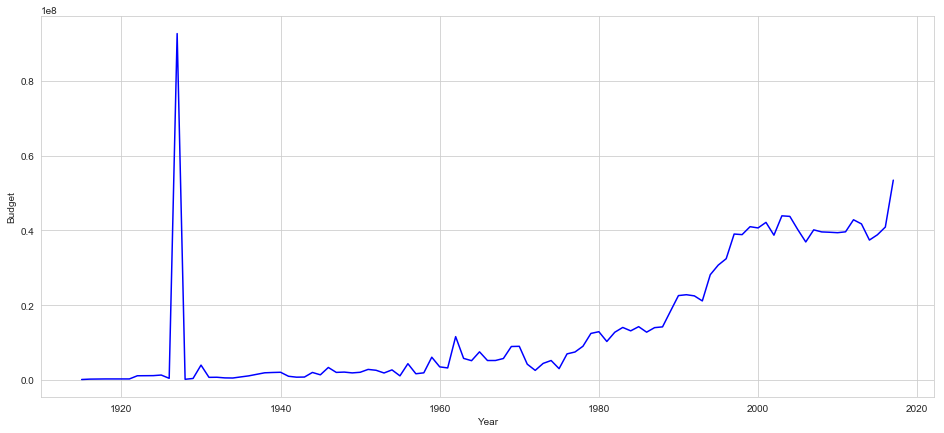

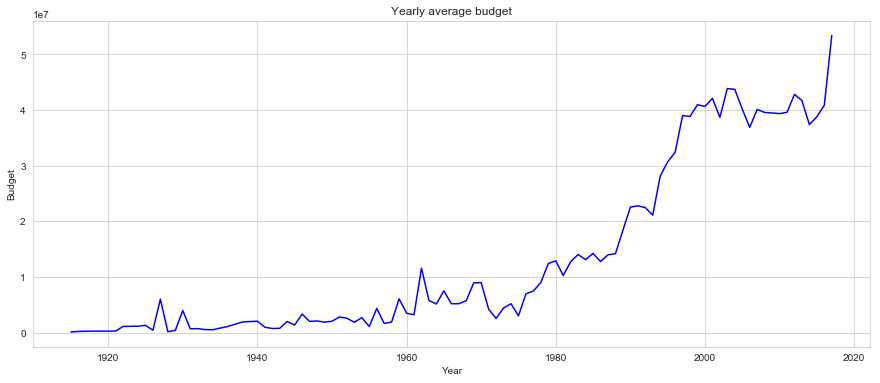

In [66]:
# Calculate average budget spent for each year 
# There is probably an outlies hidden in the dataset as it's not likely to spend this amount on movies in the end of 30's... 
# We will have closer look later
budget_year = df.groupby(by='year')['budget'].mean()
budget_year.sort_values()
plt.figure(figsize=(16,7))
plt.plot(budget_year.index, budget_year.values, '-', color = 'blue')
plt.xlabel('Year')
plt.ylabel('Budget')

#finding the outlier:
print(df[(df['year']>1925) & (df['year']<1935)][['id', 'title', 'budget']])

#We se that "Metropolis" has a budget of 92M. We checked online and saw that the real budget was 6M. Let's replace this value
df.loc[df['id'] == 19, ['budget']] = 6000000

#Replotting the trend
budget_year = df.groupby(by='year')['budget'].mean()
budget_year.sort_values()
plt.figure(figsize=(15,6))
plt.plot(budget_year.index, budget_year.values, '-', color = 'blue')
plt.title('Yearly average budget')
plt.xlabel('Year')
plt.ylabel('Budget')


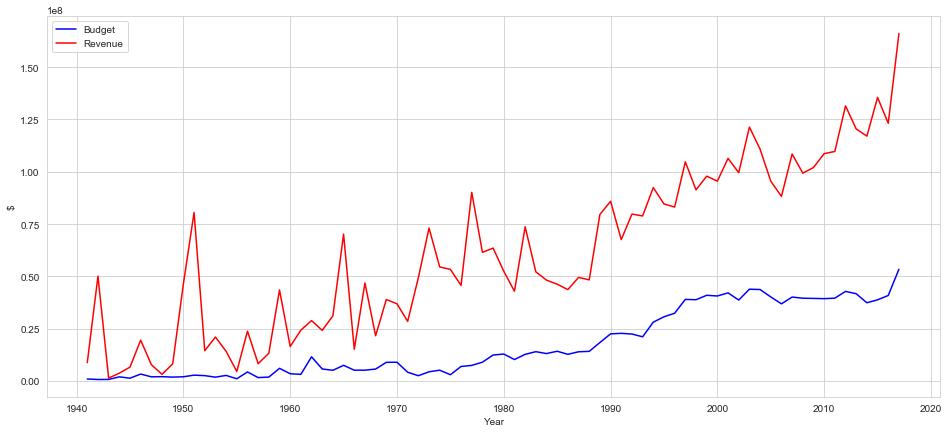

In [17]:
# Show budget and revenue curves for all the years

budget_year = df.groupby(by=df[df['year']>1940]['year'])['budget'].mean()
revenue_year = df.groupby(by=df[df['year']>1940]['year'])['revenue'].mean()
#difference = [revenue_year.values[x]-budget_year.values[x] for x in range(len(revenue_year.values))]

plt.figure(figsize=(16,7))
plt.plot(budget_year.index, budget_year.values, '-', color = 'blue', label='Budget')
plt.plot(revenue_year.index, revenue_year.values, '-', color = 'red', label='Revenue')
#plt.plot(revenue_year.index, difference, '-', color = 'green', label='Difference')

plt.xlabel('Year')
plt.ylabel('$')
plt.legend()

C:\Users\Anastasia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


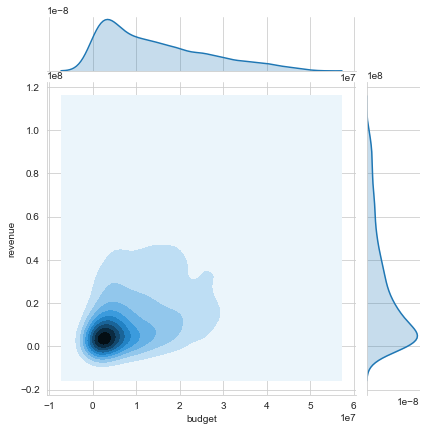

In [40]:
#Kernel density estimation
#df_sns = pd.DataFrame(data=list(zip(revenue_year.index, ratio)), columns=["Year", "%"])
#df_sns = pd.DataFrame(data=df[['budget', 'revenue']], columns=["Budget", "Revenue"])
df_temp = df[(df['budget'] < 50000000)&(df['budget'] > 100000)&(df['revenue'] < 100000000)]
sns.jointplot(x="budget", y="revenue", data=df_temp[['budget', 'revenue']], kind="kde")

Mean ratio for 1985-2004:  34.67240611358524


Text(0.5, 1.0, 'Budget to Revenue ratio, %')

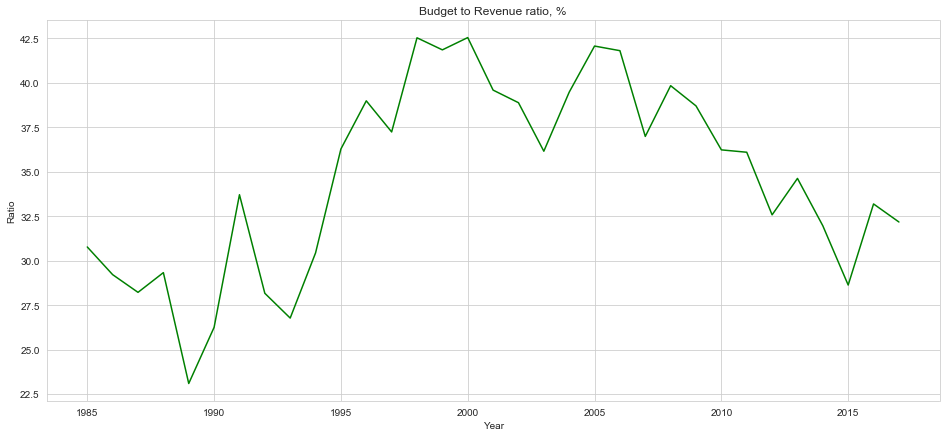

In [19]:
# Show Budget to Revenue ratio
df_time = df[(df['year']>=1985)&(df['year']<2020)]

budget_year = df_time.groupby(df_time['year'])['budget'].mean()
revenue_year = df_time.groupby(df_time['year'])['revenue'].mean()
#count_year = df_time.groupby(df_time['year_month'])['revenue'].count().reset_index()

ratio = [budget_year.values[x]*100/revenue_year.values[x] for x in range(len(revenue_year.values))] #without .reset_index()
#ratio = [budget_year.iloc[x,1]*100/revenue_year.iloc[x,1] for x in range(len(revenue_year.values))]
#ratio = budget_year['budget']*100/revenue_year['revenue']
print('Mean ratio for 1985-2004: ', np.mean(ratio))

#budget_year = df.groupby(by=df[(df['year']>=2000)&(df['year']<2017)]['year'])['budget'].mean()
#revenue_year = df.groupby(by=df[(df['year']>=2000)&(df['year']<2017)]['year'])['revenue'].mean()
#count_year = df.groupby(by=df[(df['year']>=2000)&(df['year']<2017)]['year'])['revenue'].count()
#print(count_year)
#ratio = [budget_year.values[x]/revenue_year.values[x] for x in range(len(revenue_year.values))]
#print('Mean ratio for 2000-2016: ', np.mean(ratio))

plt.figure(figsize=(16,7))
#plt.plot(budget_year.index, budget_year.values, '-', color = 'blue', label='Budget')
#plt.plot(revenue_year.index, revenue_year.values, '-', color = 'red', label='Revenue')

#plt.plot(revenue_year.index, ratio, '-', color = 'green')
plt.plot(revenue_year.index, ratio, '-', color = 'green')
#sns.kdeplot(revenue_year.index, ratio)
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Budget to Revenue ratio, %')

#df_sns = pd.DataFrame(data=list(zip(revenue_year.index, ratio)), columns=["Year", "%"])
#sns.lmplot(x="Year", y="%", data=df_sns);

In [ ]:
# Show the raitings for each Marvel movie
df.head(5)
value_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
marvel = df.iloc[value_extractor(df, 'production_companies', 'Marvel'),:]
print('number of rows in df_marvel: ', marvel['id'].count())
marvel.sort_values(by='budget')
marvel.reset_index(drop=True, inplace=True)
marvel = marvel[['id','title']]

#Add raitings to a temporary dataframe from different dataset
ratings = pd.read_csv('data/ratings.csv')
ratings.rename(columns={'movieId':'id'}, inplace=True)
del_index = ratings[ratings['rating'] == 0].index
ratings.drop(del_index, inplace=True)
ratings.reset_index(drop=True, inplace=True)

marvel = marvel.merge(ratings, on='id', how='inner')

sns.set(rc={'figure.figsize':(20,8.27)})
sns.boxplot(x=marvel['title'], y=marvel['rating'])
plt.xticks(rotation=45)

number of rows in df_marvel:  40


## Multiple variables (Categorical x Categorical)

        - production_companies VS genre

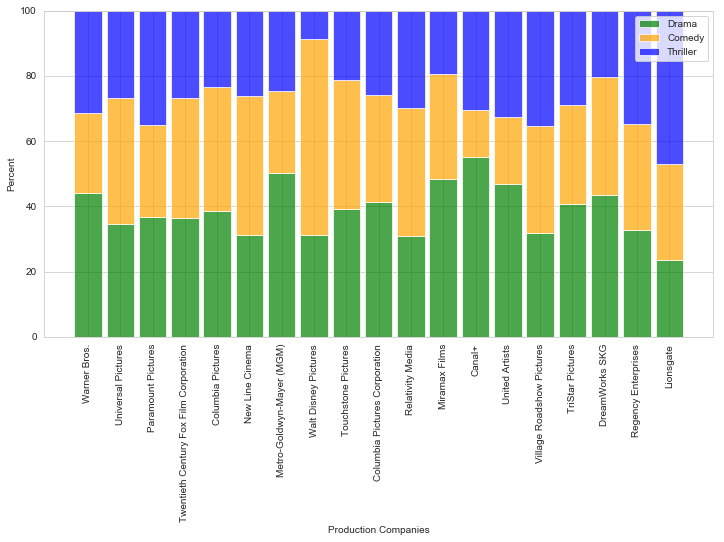

In [34]:
# Percentage ratio of the number of films in the three largest genres (Drama, Comedy, Thriller) 
# for each of the 20 biggest companies
# Results don't differemciate much. We can make some conclusions as: Universal produces more thrillers and less dramas then 
# Warner brothers

#Extracting list of companies into prod
l=[]
for i, item in enumerate(df['production_companies']):
    for cell in item:
        l.append(cell['name'])
p_name, p_count = np.unique(np.array(l), return_counts=True)
prod_all_list = list(zip(p_name, p_count)) # list of Unique Values along with occurrence Count

#Sorting by number of movies in order to get 20 biggect comanies 
prod_all = sorted(prod_all_list, key = lambda x: x[1], reverse = True) 

# Getting names of 20 companies into a list
prod = []
for i in range(19):
    prod.append(prod_all[i][0])

# Two-level extraction:  
# Rows with each Production company and number of Genres as internal extraction
index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]

drama = []
comedy = []
thriller = []
for i, item in enumerate(prod):
    df_prod = df.iloc[index_extractor(df, 'production_companies', item),:]
    drama.append(df_prod.iloc[index_extractor(df_prod, 'genres', 'Drama'),:]['id'].count())
    comedy.append(df_prod.iloc[index_extractor(df_prod, 'genres', 'Comedy'),:]['id'].count())
    thriller.append(df_prod.iloc[index_extractor(df_prod, 'genres', 'Thriller'),:]['id'].count())

raw_data = {'drama': drama, 
            'comedy': comedy, 
            'thriller': thriller}

# From raw value to percentage
totals = [float(i+j+k) for i,j,k in zip(raw_data['drama'], raw_data['comedy'], raw_data['thriller'])]
dBars = [i / j * 100 for i,j in zip(raw_data['drama'], totals)]
cBars = [i / j * 100 for i,j in zip(raw_data['comedy'], totals)]
tBars = [i / j * 100 for i,j in zip(raw_data['thriller'], totals)]

# plot
barWidth = 0.85
names = prod
r = range(len(prod))
plt.figure(figsize=(12,6))
# Create green Bars
plt.bar(r, dBars, edgecolor='white', width=barWidth, alpha=0.7, color='g', label='Drama')
# Create orange Bars
plt.bar(r, cBars, bottom=dBars, edgecolor='white', width=barWidth, alpha=0.7, color='orange', label='Comedy')
# Create blue Bars
plt.bar(r, tBars, bottom=[i+j for i,j in zip(dBars, cBars)], edgecolor='white', width=barWidth, alpha=0.7, color='b', label='Thriller')

# Limit on y-axis
plt.ylim(0,100)

# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.ylabel("Percent")
plt.xlabel("Production Companies")

plt.legend()

# Show graphic
plt.show()



# Business Perspective

- Descriptive
     - Show four most popular genres for the four last decades
     - What is the total yearly budget and revenue for Universal Pictures, starting 1970?
- Diagnostic
     - Does the average vote affect revenue?
     - Does the popularity affect revenue?
     - Does the month of release date affect Revenue?

In [63]:
# Show four most popular genres the four last decades

#Extracting list of genres
l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
g_name, g_count = np.unique(np.array(l), return_counts=True)

#------------------------------------------------------------------------------
# Function that takes dataframe and returns percentages of movie opularity in every genre
def movie_genre(df_10):
    # Extracting mean of popularity of each genre into votes
    index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
    votes = []
    revenue=[]
    for i, item in enumerate(g_name):
        votes.append(df_10.iloc[index_extractor(df_10, 'genres', item),:]['popularity'].sum())
        revenue.append(df_10.iloc[index_extractor(df_10, 'genres', item),:]['revenue'].sum())
        
    # Calculating percentage
    total_v = np.sum(votes)
    total_r = np.sum(revenue)
    
    for i in range(len(votes)):
        votes[i] = votes[i]/total_v*100
        revenue[i] = revenue[i]/total_r*100

    # Zip and Sort by popularity percentage 
    sorted_genres = sorted(list(zip(g_name, votes, g_count, revenue)), key = lambda x: x[1], reverse = True)
    return sorted_genres

#-------------------------------------------------------------------------------
# Taking 1980 to 1990
df_10 = df[(df['year']>=1980) & (df['year']<1990)]
g_v_c_1 = movie_genre(df_10)
print('1980-1990: ')
for i in range(4): 
    print(g_v_c_1[i][0], ': ', round(g_v_c_1[i][1],2), '%; revenue: ', round(g_v_c_1[i][3],2))

#-------------------------------------------------------------------------------
# Taking 1990 to 2000
df_10 = df[(df['year']>=1990) & (df['year']<2000)]
g_v_c_2 = movie_genre(df_10)
print('\n1990-2000: ')
for i in range(4): 
    print(g_v_c_2[i][0], ': ', round(g_v_c_2[i][1],2), '%; revenue: ', round(g_v_c_1[i][3],2))

#-------------------------------------------------------------------------------
# Taking 2000 to 2010
df_10 = df[(df['year']>=2000) & (df['year']<2010)]
g_v_c_3 = movie_genre(df_10)
print('\n2000-2010: ')
for i in range(4): 
    print(g_v_c_3[i][0], ': ', round(g_v_c_3[i][1],2), '%; revenue: ', round(g_v_c_1[i][3],2))

#-------------------------------------------------------------------------------
# Taking 2010 to 2020
df_10 = df[(df['year']>=2010) & (df['year']<2020)]
g_v_c_4 = movie_genre(df_10)
print('\n2010-2020: ')
for i in range(4): 
    print(g_v_c_4[i][0], ': ', round(g_v_c_4[i][1],2), '%; revenue: ', round(g_v_c_1[i][3],2))


1980-1990: 
Drama :  13.11 %; revenue:  10.58
Comedy :  12.71 %; revenue:  14.15
Action :  11.12 %; revenue:  13.94
Thriller :  9.77 %; revenue:  7.89

1990-2000: 
Drama :  16.22 %; revenue:  10.58
Thriller :  12.61 %; revenue:  14.15
Comedy :  12.21 %; revenue:  13.94
Action :  10.68 %; revenue:  7.89

2000-2010: 
Drama :  15.63 %; revenue:  10.58
Comedy :  11.69 %; revenue:  14.15
Thriller :  11.36 %; revenue:  13.94
Action :  10.6 %; revenue:  7.89

2010-2020: 
Drama :  16.23 %; revenue:  10.58
Action :  12.59 %; revenue:  14.15
Thriller :  11.21 %; revenue:  13.94
Comedy :  11.05 %; revenue:  7.89


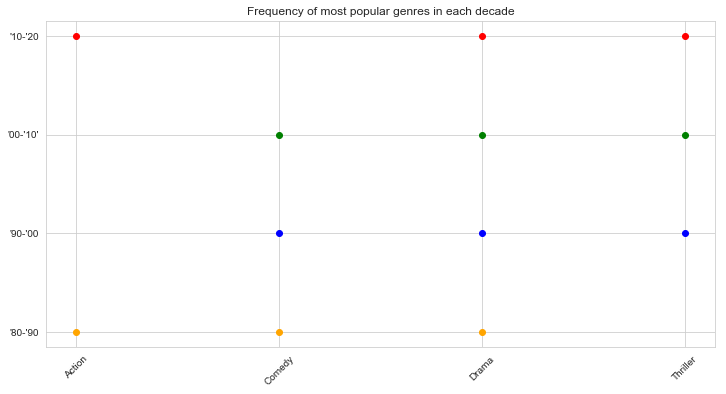

In [64]:
#Showing results
#We are seeing that through 4 decades Comedy is the most popular genre

#Slicing four most popular genres
g1 = [g_v_c_1[x] for x in range(4)]
g2 = [g_v_c_2[x] for x in range(4)]
g3 = [g_v_c_3[x] for x in range(4)]
g4 = [g_v_c_4[x] for x in range(4)]

names_unique = list(np.unique(list([g1[x][0] for x in range(4)]) + list([g2[x][0] for x in range(4)]) + list([g3[x][0] for x in range(4)]) + list([g4[x][0] for x in range(4)])))

values1 = [[names_unique.index(g1[x][0])+1 for x in range(3)],[1 for x in range(3)]]
values2 = [[names_unique.index(g2[x][0])+1 for x in range(3)],[2 for x in range(3)]]
values3 = [[names_unique.index(g3[x][0])+1 for x in range(3)],[3 for x in range(3)]]
values4 = [[names_unique.index(g4[x][0])+1 for x in range(3)],[4 for x in range(3)]]
labels_x = names_unique
labels_y = ["'80-'90", "'90-'00", "'00-'10'", "'10-'20"]
plt.figure(figsize=(12,6))
plt.title('Frequency of most popular genres in each decade')
plt.xticks(range(1,len(labels_x)+2), labels_x, rotation=45)
plt.yticks(range(1,len(labels_y)+2), labels_y, rotation='horizontal')

plt.plot(values1[0], values1[1], 'o', color='orange')
plt.plot(values2[0], values2[1], 'o', color='blue')
plt.plot(values3[0], values3[1], 'o', color='green')
plt.plot(values4[0], values4[1], 'o', color='red')



plt.show()

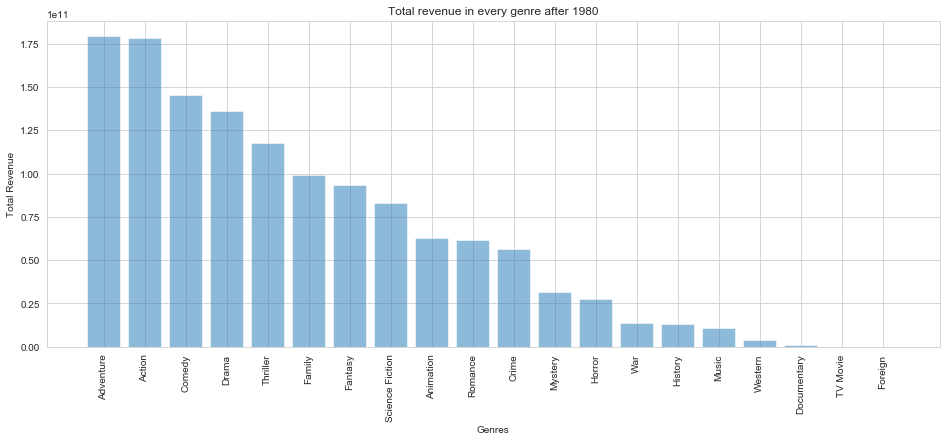

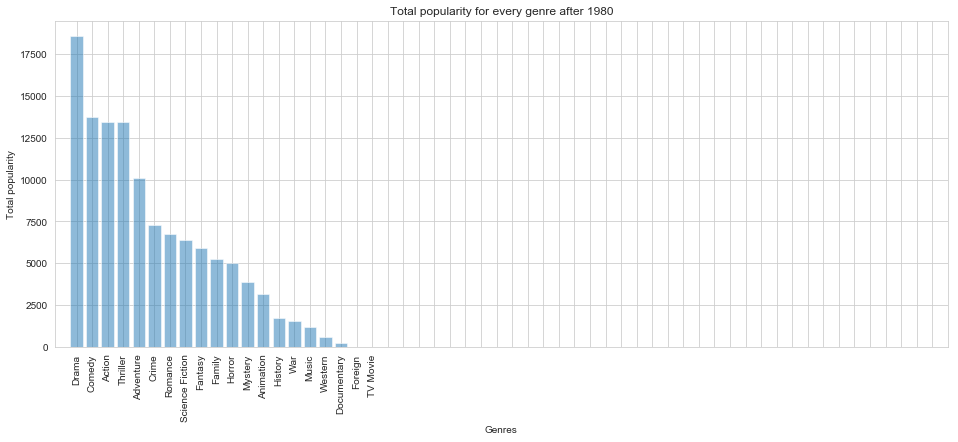

In [15]:
# Show total revenues for each genre
df_t = df[df['year']>=1980]


#Extracting list of genres
l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
g_name, g_count = np.unique(np.array(l), return_counts=True)

#------------------------------------------------------------------------------
# Calculating total revenue of movies in every genre

index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
revenue = []
for i, item in enumerate(g_name):
    #print('genre: ', item, '\n',df_t.iloc[index_extractor(df_t, 'genres', item),:][['title','revenue']])
    revenue.append(df_t.iloc[index_extractor(df_t, 'genres', item),:]['revenue'].sum())

rev_all_list = sorted(zip(g_name, revenue), key = lambda x: x[1], reverse = True) # list of names along with revenues sorted
rev_genre = [rev_all_list[x][0] for x in range(len(rev_all_list ))]
rev_value = [rev_all_list[x][1] for x in range(len(rev_all_list ))]
    
# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Total revenue in every genre after 1980')
plt.xlabel('Genres')
plt.ylabel('Total Revenue')
x_pos = range(len(rev_genre))
plt.bar(x_pos, rev_value, align='center', alpha=0.5)
plt.xticks(x_pos, rev_genre, rotation='vertical')
plt.show()

#------------------------------------------------------------------------------
# Calculating total popularity for every genre
index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
budget = []
for i, item in enumerate(g_name):
    budget.append(df_t.iloc[index_extractor(df_t, 'genres', item),:]['popularity'].sum())

bud_all_list = sorted(zip(g_name, budget), key = lambda x: x[1], reverse = True) # list of names along with budget sorted
bud_genre = [bud_all_list[x][0] for x in range(len(bud_all_list ))]
bud_value = [bud_all_list[x][1] for x in range(len(bud_all_list ))]
    
# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Total popularity for every genre after 1980')
plt.xlabel('Genres')
plt.ylabel('Total popularity')
x_pos = range(len(bud_genre))
plt.bar(x_pos,bud_value, align='center', alpha=0.5)
plt.xticks(y_pos, bud_genre, rotation='vertical')
plt.show()

In [16]:
#top revenues in adventure after 1980

index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
df_adv = df_t.iloc[index_extractor(df_t, 'genres', 'Adventure'),:]
top_rev = df_adv.sort_values(by='revenue',ascending=False)
print(top_rev[['title','revenue']].head(10))

                                              title       revenue
4865                   Star Wars: The Force Awakens 2068223624.00
4870                                 Jurassic World 1513528810.00
4895                        Avengers: Age of Ultron 1405403694.00
4810   Harry Potter and the Deathly Hallows: Part 2 1342000000.00
4798                                         Frozen 1274219009.00
4793                                     Iron Man 3 1215439994.00
737                  Transformers: Dark of the Moon 1123746996.00
4847  The Lord of the Rings: The Return of the King 1118888979.00
4728                                        Skyfall 1108561013.00
4649                Transformers: Age of Extinction 1091405097.00


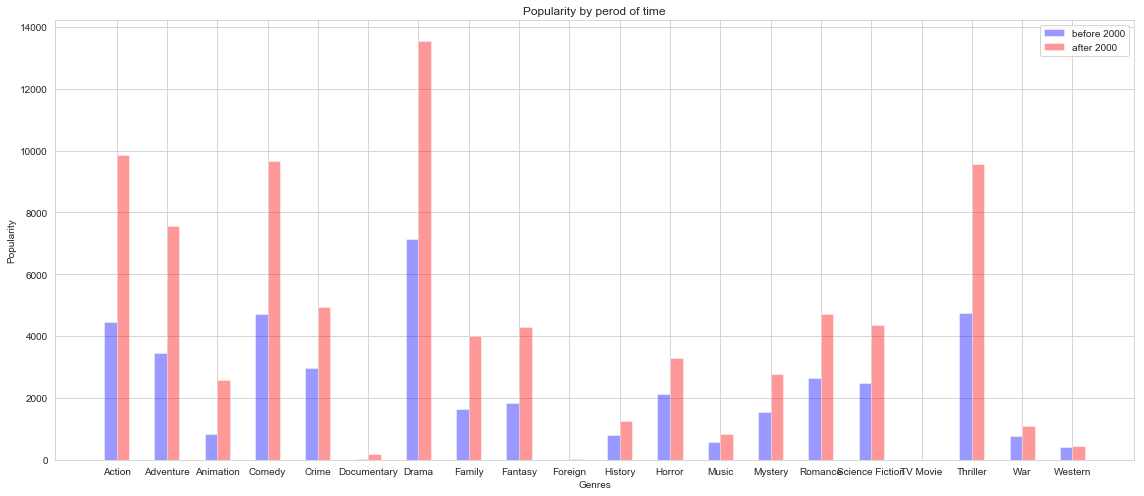

In [17]:
# Show total popularity for each genre

#Extracting list of genres
l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
g_name, g_count = np.unique(np.array(l), return_counts=True)

#------------------------------------------------------------------------------
# Calculating total popularity of movies in every genre
df_earlier = df[df['year'] < 2000]
index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
popularity = []
for i, item in enumerate(g_name):
    popularity.append(df_earlier.iloc[index_extractor(df_earlier, 'genres', item),:]['popularity'].sum())

#---------------------------------------------
# And during the period after 2000:
df_later = df[df['year'] >= 2000]
popularity_later = []
for i, item in enumerate(g_name):
    popularity_later.append(df_later.iloc[index_extractor(df_later, 'genres', item),:]['popularity'].sum())

# Bar Chart
fig, ax = plt.subplots(figsize=(16,7))
index = np.arange(len(g_name))
bar_width = 0.25
opacity = 0.4

rects1 = ax.bar(index, popularity, bar_width,
                alpha=opacity, color='b',
                label='before 2000')

rects2 = ax.bar(index + bar_width, popularity_later, bar_width,
                alpha=opacity, color='r',
                label='after 2000')

ax.set_xlabel('Genres')
ax.set_ylabel('Popularity')
ax.set_title('Popularity by perod of time')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(g_name)
ax.legend()

fig.tight_layout()
plt.show()

number of movies of Universal:  406

       id title   budget      revenue  year
4706  578  Jaws  7000000 470654000.00  1975


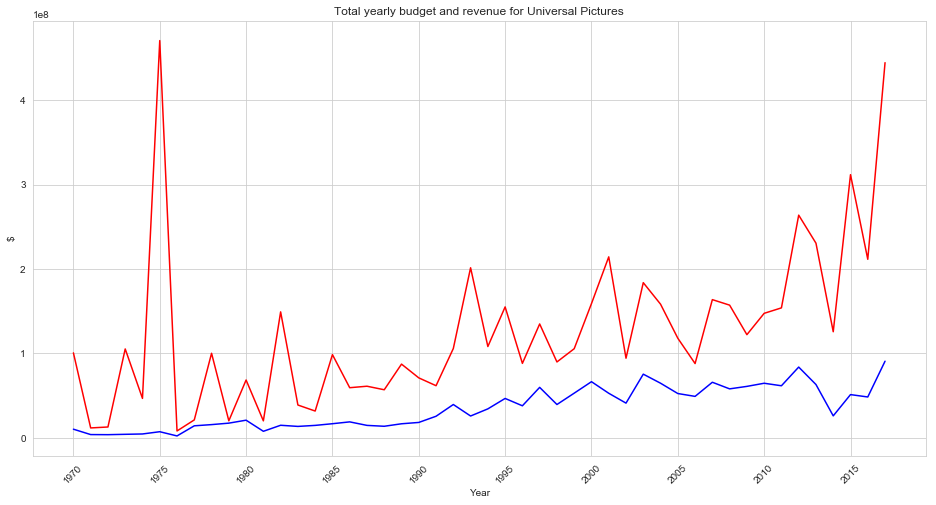

In [18]:
# What is the total yearly budget and revenue for Universal Pictures, starting 1970?
# And the average

#Extract Universal
value_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]

df_u = df.iloc[value_extractor(df, 'production_companies', 'Universal'),:]
print('number of movies of Universal: ', df_u['id'].count())

#Cut of years < 1970
df_u =  df_u[df_u['year'] >= 1970]

budget_year_u = df_u.groupby(by='year')['budget'].mean()
#print('Total budget per year:\n', budget_year_u.sort_values(ascending=False))
print('')
revenue_year_u = df_u.groupby(by='year')['revenue'].mean()
#print('Total revenue per year:\n', revenue_year_u.sort_values(ascending=False))

plt.figure(figsize=(16,8))
plt.plot(budget_year_u.index, budget_year_u.values, '-', color = 'blue', label='Budget')
plt.plot(revenue_year_u.index, revenue_year_u.values, '-', color = 'red', label='Revenue')
plt.title('Total yearly budget and revenue for Universal Pictures')
labels = [str(x) for x in range(1970, 2020, 5)]
plt.xticks(range(1970, 2020, 5), labels, rotation=45)
plt.xlabel('Year')
plt.ylabel('$')

#We see suspicious race of revenue in 1975. Lets look closer:
print(df_u[df_u['year']==1975][['id', 'title', 'budget', 'revenue', 'year']])


Correlation between revenue and votes: 

               vote_average  revenue
vote_average          1.00     0.16
revenue               0.16     1.00


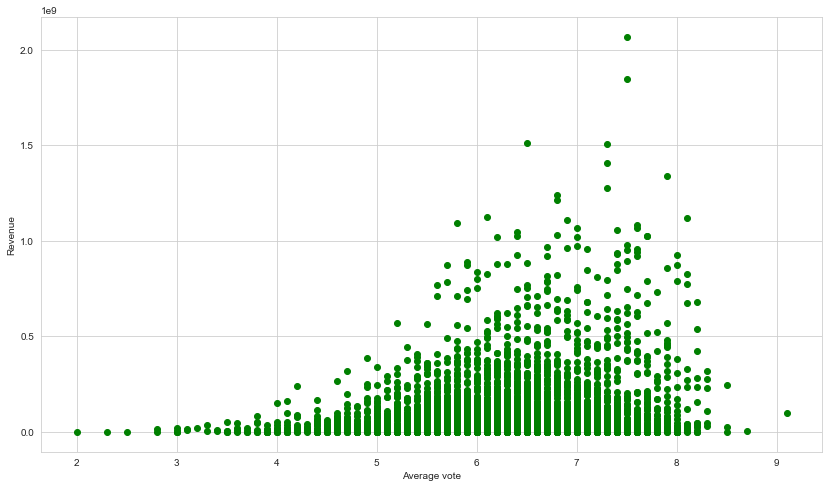

In [19]:
# Does the average vote affect revenue?
#We can see that there is very low correlation between these two features

plt.figure(figsize=(14,8))
plt.plot(df['vote_average'], df['revenue'], 'o', color='green')
plt.xlabel('Average vote')
plt.ylabel('Revenue')

print('Correlation between revenue and votes: \n\n', df[['vote_average','revenue']].corr())

Correlation between revenue and popularity: 

             popularity  revenue
popularity        1.00     0.54
revenue           0.54     1.00


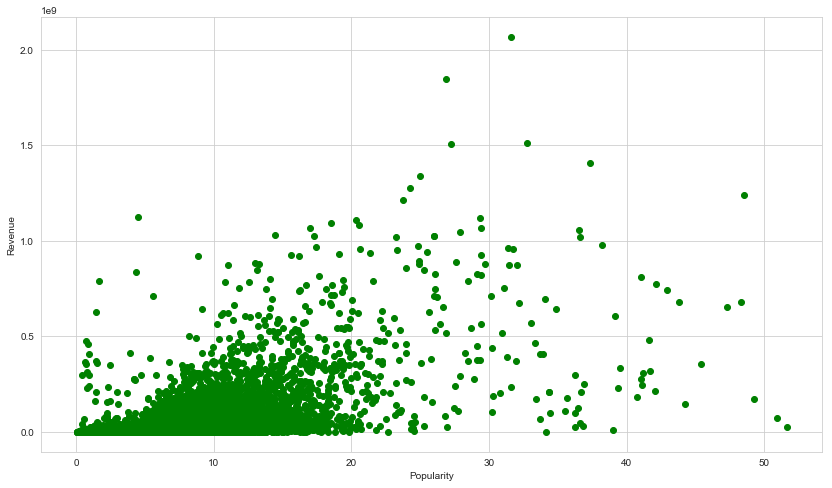

In [20]:
# Does the popularity affect revenue?
#Dependence is not observed

plt.figure(figsize=(14,8))
plt.plot(df['popularity'], df['revenue'], 'o', color='green')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

print('Correlation between revenue and popularity: \n\n', df[['popularity','revenue']].corr())

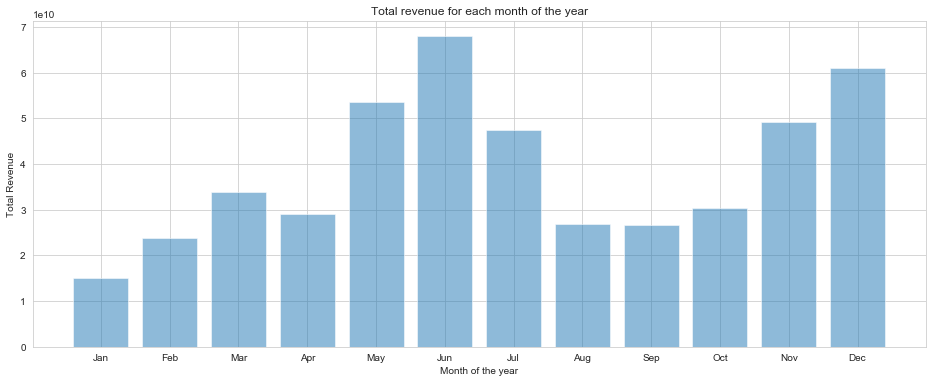

In [21]:
# Does the month of release date affect Revenue?
# December and June are the best month to release the movie
import calendar
df['month'] = df['release_date'].dt.month
df_m = df.groupby([df['release_date'].dt.month], sort=True)['revenue'].sum()
month=[]
for x in set(df['release_date'].dt.month):
    month.append(calendar.month_abbr[x])

# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Total revenue for each month of the year')
plt.xlabel('Month of the year')
plt.ylabel('Total Revenue')

plt.bar(month, df_m.values, align='center', alpha=0.5)
plt.show()